In [1]:
from __future__ import absolute_import, division, print_function

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub
import os

from tensorflow.keras import layers

tf.VERSION

W0507 18:31:38.018680 140665610479424 __init__.py:56] Some hub symbols are not available because TensorFlow version is less than 1.14


'1.13.1'

In [2]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228818944/228813984 [==============================] - 6s 0us/step


##### Pre processing

In [3]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root))

Found 3670 images belonging to 5 classes.


Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step
Training data shape :  (60000, 28, 28) (60000,)
Testing data shape :  (10000, 28, 28) (10000,)
Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Ground Truth : 7')

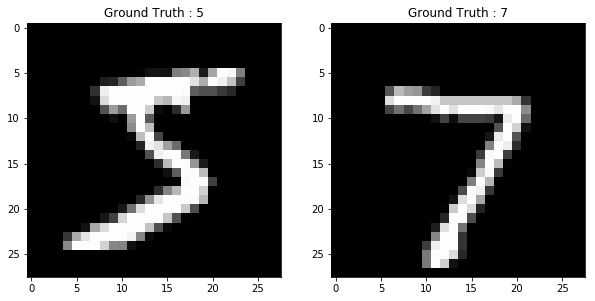

In [4]:
from keras.datasets import mnist
import numpy as np
data_root2 = mnist.load_data()
(train_images, train_labels), (test_images, test_labels) = data_root2
print('Training data shape : ', train_images.shape, train_labels.shape)
 
print('Testing data shape : ', test_images.shape, test_labels.shape)

# Find the unique numbers from the train labels
classes = np.unique(train_labels)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)
 
plt.figure(figsize=[10,5])
 
# Display the first image in training data
plt.subplot(121)
plt.imshow(train_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_labels[0]))
 
# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_images[0,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_labels[0]))

In [5]:
#os.listdir(data_root2)
print(train_labels)

[5 0 4 ... 5 6 8]


##### Not part of totorial

In [6]:
os.listdir(data_root)

['LICENSE.txt', 'sunflowers', 'tulips', 'dandelion', 'daisy', 'roses']

In [7]:
print(data_root)

/home/jovyan/.keras/datasets/flower_photos


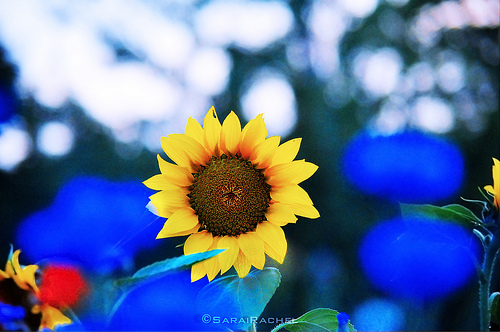

In [8]:
from IPython.display import Image
Image(data_root +'/sunflowers/7820398908_4316bbba45.jpg')

In [9]:
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 256, 256, 3)
Label batch shape:  (32, 5)


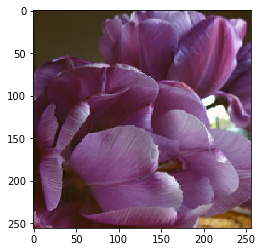

In [10]:
from matplotlib import pyplot as plt
plt.imshow(image_batch[31,:,:,:], interpolation='nearest')
plt.show()

###### Until here

In [11]:
classifier_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/classification/2" #@param {type:"string"}
def classifier(x):
  classifier_module = hub.Module(classifier_url)
  return classifier_module(x)
  
IMAGE_SIZE = hub.get_expected_image_size(hub.Module(classifier_url))

Instructions for updating:
Colocations handled automatically by placer.


W0507 18:31:51.362393 140665610479424 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/control_flow_ops.py:3632: colocate_with (from tensorflow.python.framework.ops) is deprecated and will be removed in a future version.
Instructions for updating:
Colocations handled automatically by placer.


In [12]:
classifier_layer = layers.Lambda(classifier, input_shape = IMAGE_SIZE+[3])
classifier_model = tf.keras.Sequential([classifier_layer])
classifier_model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0507 18:31:55.911988 140665610479424 saver.py:1483] Saver not created because there are no variables in the graph to restore


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda (Lambda)              (None, 1001)              0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


In [13]:
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SIZE)
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Found 3670 images belonging to 5 classes.
Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


In [14]:
import tensorflow.keras.backend as K
sess = K.get_session()
init = tf.global_variables_initializer()

sess.run(init)

In [15]:
print(IMAGE_SIZE)

[224, 224]


65536/61306 [================================] - 0s 1us/step


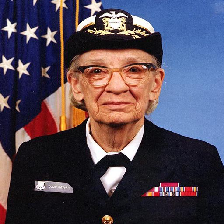

In [16]:
import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SIZE)
grace_hopper 

In [17]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

In [18]:
result = classifier_model.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

In [19]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

In [20]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

16384/10484 [==============================================] - 0s 0us/step


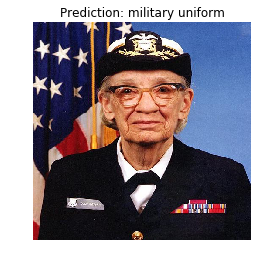

In [21]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name)

In [22]:
result_batch = classifier_model.predict(image_batch)

In [23]:
labels_batch = imagenet_labels[np.argmax(result_batch, axis=-1)]
labels_batch

array(['head cabbage', 'hip', 'corn', 'hip', 'picket fence', 'bee',
       'porcupine', 'hip', 'plate', 'oxcart', 'stinkhorn', 'apiary',
       'pot', 'daisy', 'cardoon', 'ant', 'guillotine', 'head cabbage',
       "jack-o'-lantern", 'gyromitra', 'daisy', 'daisy', 'bee', 'bee',
       'street sign', 'cabbage butterfly', 'conch', 'ear', 'tray', 'bee',
       'bearskin', 'picket fence'], dtype='<U30')

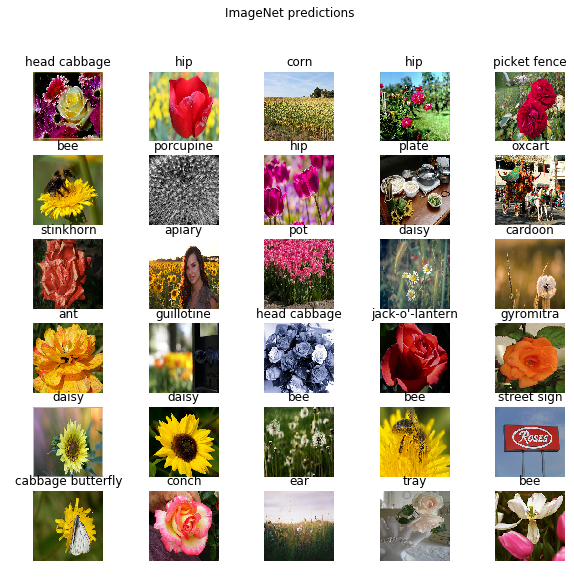

In [24]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(labels_batch[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

###### Transfer learning:

In [25]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/2" #@param {type:"string"}
def feature_extractor(x):
  feature_extractor_module = hub.Module(feature_extractor_url)
  return feature_extractor_module(x)

IMAGE_SIZE = hub.get_expected_image_size(hub.Module(feature_extractor_url))

In [26]:
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SIZE)
for image_batch,label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Labe batch shape: ", label_batch.shape)
  break

Found 3670 images belonging to 5 classes.
Image batch shape:  (32, 224, 224, 3)
Labe batch shape:  (32, 5)


In [27]:
features_extractor_layer = layers.Lambda(feature_extractor, input_shape=IMAGE_SIZE+[3])
features_extractor_layer.trainable = False

In [28]:
model = tf.keras.Sequential([
  features_extractor_layer,
  layers.Dense(image_data.num_classes, activation='softmax')
])
model.summary()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0507 18:32:06.598415 140665610479424 saver.py:1483] Saver not created because there are no variables in the graph to restore


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_1 (Lambda)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 6,405
Trainable params: 6,405
Non-trainable params: 0
_________________________________________________________________


In [29]:
init = tf.global_variables_initializer()
sess.run(init)
result = model.predict(image_batch)
result.shape

(32, 5)

In [30]:
model.compile(
  optimizer=tf.train.AdamOptimizer(), 
  loss='categorical_crossentropy',
  metrics=['accuracy'])

In [31]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []
    
  def on_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])

In [32]:
steps_per_epoch = image_data.samples//image_data.batch_size
batch_stats = CollectBatchStats()
model.fit((item for item in image_data), epochs=1, 
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [batch_stats])

Instructions for updating:
Use tf.cast instead.


W0507 18:32:12.156060 140665610479424 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/ops/math_ops.py:3066: to_int32 (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.cast instead.


114/114 [==============================] - 68s 598ms/step - loss: 0.7196 - acc: 0.7383


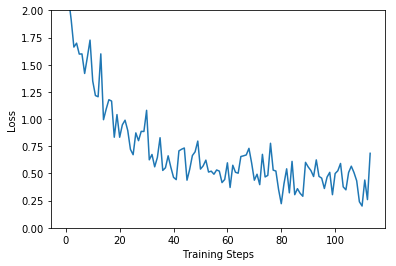

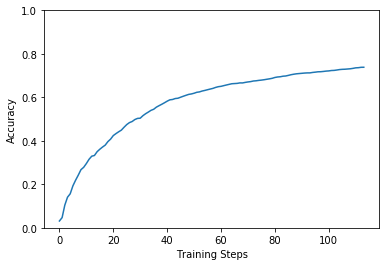

In [33]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats.batch_losses)

plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats.batch_acc)

In [34]:
label_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
label_names = np.array([key.title() for key, value in label_names])
label_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

In [35]:
result_batch = model.predict(image_batch)

labels_batch = label_names[np.argmax(result_batch, axis=-1)]
labels_batch

array(['Dandelion', 'Dandelion', 'Roses', 'Dandelion', 'Dandelion',
       'Sunflowers', 'Dandelion', 'Tulips', 'Tulips', 'Sunflowers',
       'Roses', 'Sunflowers', 'Daisy', 'Tulips', 'Dandelion', 'Tulips',
       'Dandelion', 'Tulips', 'Daisy', 'Dandelion', 'Roses', 'Sunflowers',
       'Sunflowers', 'Roses', 'Daisy', 'Tulips', 'Roses', 'Sunflowers',
       'Sunflowers', 'Daisy', 'Sunflowers', 'Roses'], dtype='<U10')

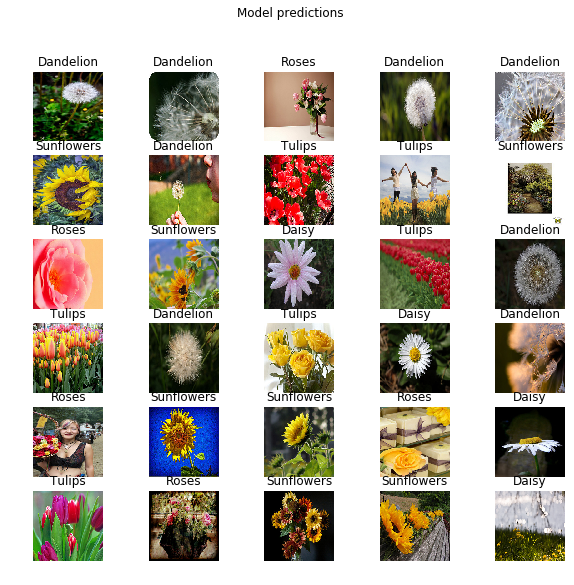

In [36]:
plt.figure(figsize=(10,9))
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(labels_batch[n])
  plt.axis('off')
_ = plt.suptitle("Model predictions")

In [37]:
export_path = tf.contrib.saved_model.save_keras_model(model, "./saved_models")


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


W0507 18:33:30.078402 140665610479424 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/network.py:1436: update_checkpoint_state (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.train.CheckpointManager to manage checkpoints rather than manually editing the Checkpoint proto.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0507 18:33:32.694524 140665610479424 saver.py:1483] Saver not created because there are no variables in the graph to restore


Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


W0507 18:33:34.120730 140665610479424 deprecation.py:323] From /opt/conda/lib/python3.7/site-packages/tensorflow/python/saved_model/signature_def_utils_impl.py:257: build_tensor_info (from tensorflow.python.saved_model.utils_impl) is deprecated and will be removed in a future version.
Instructions for updating:
This function will only be available through the v1 compatibility library as tf.compat.v1.saved_model.utils.build_tensor_info or tf.compat.v1.saved_model.build_tensor_info.


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0507 18:33:34.123968 140665610479424 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0507 18:33:34.126865 140665610479424 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


I0507 18:33:34.130153 140665610479424 export.py:587] Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: ['train']


I0507 18:33:34.133808 140665610479424 export.py:587] Signatures INCLUDED in export for Train: ['train']


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0507 18:33:34.136003 140665610479424 export.py:587] Signatures INCLUDED in export for Eval: None


W0507 18:33:34.138727 140665610479424 tf_logging.py:161] Export includes no default signature!


INFO:tensorflow:No assets to save.


I0507 18:33:34.993052 140665610479424 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0507 18:33:34.994537 140665610479424 builder_impl.py:124] No assets to write.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0507 18:33:37.212784 140665610479424 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0507 18:33:37.919830 140665610479424 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0507 18:33:37.922989 140665610479424 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: None


I0507 18:33:37.926721 140665610479424 export.py:587] Signatures INCLUDED in export for Predict: None


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0507 18:33:37.928137 140665610479424 export.py:587] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: ['eval']


I0507 18:33:37.931255 140665610479424 export.py:587] Signatures INCLUDED in export for Eval: ['eval']


W0507 18:33:37.934073 140665610479424 tf_logging.py:161] Export includes no default signature!


INFO:tensorflow:No assets to save.


I0507 18:33:38.312528 140665610479424 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0507 18:33:38.316155 140665610479424 builder_impl.py:124] No assets to write.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


I0507 18:33:41.021952 140665610479424 saver.py:1483] Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Signatures INCLUDED in export for Classify: None


I0507 18:33:41.650715 140665610479424 export.py:587] Signatures INCLUDED in export for Classify: None


INFO:tensorflow:Signatures INCLUDED in export for Regress: None


I0507 18:33:41.652008 140665610479424 export.py:587] Signatures INCLUDED in export for Regress: None


INFO:tensorflow:Signatures INCLUDED in export for Predict: ['serving_default']


I0507 18:33:41.654884 140665610479424 export.py:587] Signatures INCLUDED in export for Predict: ['serving_default']


INFO:tensorflow:Signatures INCLUDED in export for Train: None


I0507 18:33:41.656017 140665610479424 export.py:587] Signatures INCLUDED in export for Train: None


INFO:tensorflow:Signatures INCLUDED in export for Eval: None


I0507 18:33:41.657030 140665610479424 export.py:587] Signatures INCLUDED in export for Eval: None


INFO:tensorflow:No assets to save.


I0507 18:33:42.079365 140665610479424 builder_impl.py:629] No assets to save.


INFO:tensorflow:No assets to write.


I0507 18:33:42.080908 140665610479424 builder_impl.py:124] No assets to write.


INFO:tensorflow:SavedModel written to: ./saved_models/1557254008/saved_model.pb


I0507 18:33:42.362529 140665610479424 builder_impl.py:414] SavedModel written to: ./saved_models/1557254008/saved_model.pb


In [38]:
export_path

b'./saved_models/1557254008'

##### Feed forward network

In [39]:
model = tf.keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(np.prod(IMAGE_SIZE),)),
    layers.Dense(512, activation='relu'),
    layers.Dense(image_data.num_classes, activation='softmax')])
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               25690624  
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 2565      
Total params: 25,955,845
Trainable params: 25,955,845
Non-trainable params: 0
_________________________________________________________________


In [40]:
steps_per_epoch = image_data.samples//image_data.batch_size
batch_stats = CollectBatchStats()
model.fit((item for item in image_data), epochs=1, 
                    steps_per_epoch=steps_per_epoch,
                    callbacks = [batch_stats])

ValueError: Error when checking input: expected dense_1_input to have 2 dimensions, but got array with shape (32, 224, 224, 3)

In [ ]:
print(image_data)

In [ ]:
print(type(image_data))
print(image_data.subset)
print(IMAGE_SIZE)

In [ ]:
print(np.prod(IMAGE_SIZE))
train_images.shape[1:]